In [1]:
import os, shutil

In [2]:
original_dataset_dir = "H:\Professional Certification\Deep Learning-Udemy-October 2020\PetImages"

In [3]:
base_dir = "H:\Professional Certification\Deep Learning-Udemy-October 2020\cats_dogs_small"

**Run only once**

In [ ]:
os.mkdir(base_dir)

**Run always**

In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

**Run only once**

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

**Run always**

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

**Run only once**

In [ ]:
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

**Run always**

In [6]:
orig_dir_cat = os.path.join(original_dataset_dir, 'Cat')
orig_dir_cat

'H:\\Professional Certification\\Deep Learning-Udemy-October 2020\\PetImages\\Cat'

**Run only once**

In [ ]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(orig_dir_cat, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(orig_dir_cat, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(orig_dir_cat, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

**Run always**

In [7]:
orig_dir_dog = os.path.join(original_dataset_dir, 'Dog')
orig_dir_dog

'H:\\Professional Certification\\Deep Learning-Udemy-October 2020\\PetImages\\Dog'

**Run only once**

In [ ]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(orig_dir_dog, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(orig_dir_dog, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(orig_dir_dog, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

**Print Information**

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


**Data Preparation(/ Processing)**

In [9]:
import keras

Using TensorFlow backend.


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [11]:
#Rescale each pixel data (Divide by 255)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_datagen

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
print("Image Shape: ", train_generator.image_shape)
print("Batch Size: ", train_generator.batch_size)
print("Color format: ", train_generator.color_mode)

Image Shape:  (150, 150, 3)
Batch Size:  20
Color format:  rgb


In [15]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
print("Image Shape: ", validation_generator.image_shape)
print("Batch Size: ", validation_generator.batch_size)
print("Color Format: ", validation_generator.color_mode)

Image Shape:  (150, 150, 3)
Batch Size:  20
Color Format:  rgb


**Create Model**

In [17]:
from keras import layers
from keras import models
from keras import optimizers

In [18]:
model = models.Sequential()

In [19]:
#layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
#layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [21]:
#layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [22]:
#layer 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [23]:
#Flatten
model.add(layers.Flatten())

In [24]:
#Dense Layer

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [26]:
#model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(1r=1e-4),metrics=["acc"])
model.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["acc"])

In [27]:
# Install a conda package in the current Jupyter kernel
import sys

**Note : ensure to Install Pillow**

**otherwise fit_generator() fails in loading RGB images**

**cats --> 666.jpg is empty file, fit_generator()(i.e PIL load image) will give error. So replace it with some other file valid jpg file and name it 666.jpg**

In [28]:
from PIL import Image

In [30]:
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#train model
#model.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

In [31]:
#history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=40, validation_data=validation_generator, validation_steps=50)
history = model.fit_generator(train_generator, 
                              steps_per_epoch=150, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=60, 
                              callbacks=[early_stopping_monitor])

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
150/150 [==============================] - 301s 2s/step - loss: 0.7430 - acc: 0.5307 - val_loss: 0.6982 - val_acc: 0.5508
Epoch 2/30
150/150 [==============================] - 231s 2s/step - loss: 0.6612 - acc: 0.6107 - val_loss: 0.6067 - val_acc: 0.6317
Epoch 3/30
150/150 [==============================] - 260s 2s/step - loss: 0.5910 - acc: 0.6947 - val_loss: 0.5356 - val_acc: 0.6533
Epoch 4/30
150/150 [==============================] - 275s 2s/step - loss: 0.5168 - acc: 0.7440 - val_loss: 0.7315 - val_acc: 0.6883
Epoch 5/30
150/150 [==============================] - 241s 2s/step - loss: 0.4368 - acc: 0.7950 - val_loss: 0.6023 - val_acc: 0.7233
Epoch 6/30
150/150 [==============================] - 218s 1s/step - loss: 0.3775 - acc: 0.8320 - val_loss: 0.4686 - val_acc: 0.7183
Epoch 7/30
150/150 [==============================] - 249s 2s/step - loss: 0.2672 - acc: 0.8873 - val_loss: 1.3127 - val_acc: 0.6900
Epoch 8/30
150/150 [=

**Save the model**

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
#load model support ,
#from keras.models import load_model

In [ ]:
#Run only if you need to get back previously saved model
#model = load_model('cats_and_dogs_small_1.h5')

**Plot the loss and accuracy (during training)**

In [32]:
import matplotlib.pyplot as plt

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [34]:
epochs = range(1, len(acc) + 1)

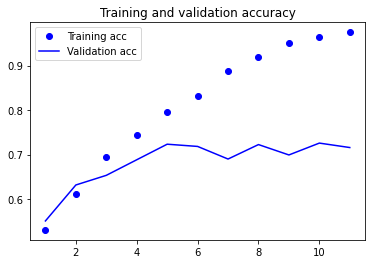

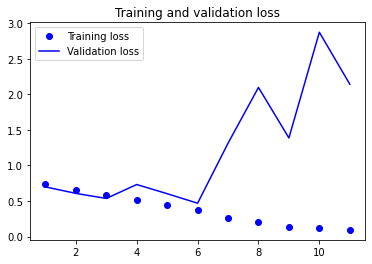

In [35]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Image Augmentation**

In [36]:
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2,
                             height_shift_range=0.2, 
                             shear_range=0.2,
                             zoom_range=0.2, 
                             horizontal_flip=True,
                             fill_mode='nearest')

**Display Augumented Images**

In [37]:
from keras.preprocessing import image

In [38]:
fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]

In [39]:
len(fnames)

1000

In [40]:
fnames[100]

'H:\\Professional Certification\\Deep Learning-Udemy-October 2020\\cats_dogs_small\\train\\cats\\189.jpg'

In [41]:
#choose one image to augumented
img_path = fnames[3]

In [42]:
img = image.load_img(img_path, target_size=(150, 150))

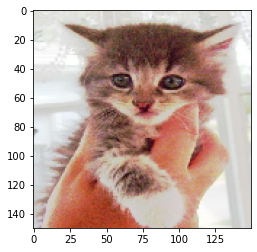

In [43]:
#ensure to import matplot lib
#plt.figure()
plt.imshow(img)

In [44]:
#convert to numpy array with image (150, 150, 3)\
x = image.img_to_array(img)

In [45]:
#reshape to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

i:  0
i:  1


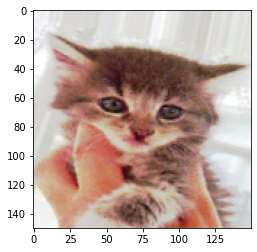

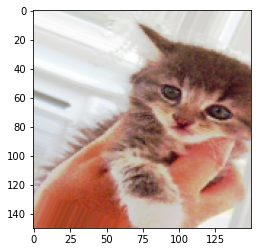

In [46]:
i = 0

#batch_size: No. of images to be yielded from the generator per batch

for batch in datagen.flow(x, batch_size=1):
    #print("Batch0 ", batch[0])
    print("i: ", i)
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        break
plt.show()

**Defining new model with dropout layer**

**Need for dropout layer**

If you train a network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images(-you can produce new information, you can only remix exsiting information).

As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you'll also add a Dropout layer to your model, right before the densely connected classifier.

With dropout layer, We now reach higher accuracy (say of 82 %), a 15 % relative improvement over the non-regularized model.

In [47]:
model1 = models.Sequential()

In [48]:
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))

In [49]:
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

In [50]:
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

In [51]:
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

In [52]:
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))

In [53]:
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [54]:
model.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["acc"])

**Augumented data (i.e using data-augumentation generators) generation for training**

In [55]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range = 40,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,)

**Not Augumunted data (just rescaling) generation for testing (i.e validation)**

In [56]:
test_datagen = ImageDataGenerator(1. / 255)

**Perform generation for training data and test data**

In [57]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (150, 150),
batch_size = 32,
class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [58]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (150, 150),
batch_size = 32,
class_mode = 'binary')

Found 1000 images belonging to 2 classes.


**Fit Generator**

In [59]:
#history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=40, validation_data=validation_generator, validation_steps=50)
history = model.fit_generator(train_generator, 
                              steps_per_epoch=150, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=60, 
                              callbacks=[early_stopping_monitor])

Epoch 1/30


C:\Users\lenovo\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


150/150 [==============================] - 493s 3s/step - loss: 0.6555 - acc: 0.6593 - val_loss: 6.4931 - val_acc: 0.6561
Epoch 2/30
150/150 [==============================] - 422s 3s/step - loss: 0.5878 - acc: 0.7064 - val_loss: 5.5882 - val_acc: 0.6741
Epoch 3/30
150/150 [==============================] - 395s 3s/step - loss: 0.5642 - acc: 0.7194 - val_loss: 6.5370 - val_acc: 0.7003
Epoch 4/30
150/150 [==============================] - 438s 3s/step - loss: 0.5552 - acc: 0.7286 - val_loss: 3.9639 - val_acc: 0.6132
Epoch 5/30
150/150 [==============================] - 400s 3s/step - loss: 0.5415 - acc: 0.7306 - val_loss: 5.4913 - val_acc: 0.7041
Epoch 6/30
150/150 [==============================] - 385s 3s/step - loss: 0.5235 - acc: 0.7452 - val_loss: 3.4874 - val_acc: 0.6485
Epoch 7/30
150/150 [==============================] - 374s 2s/step - loss: 0.5141 - acc: 0.7616 - val_loss: 2.0038 - val_acc: 0.7158
Epoch 8/30
150/150 [==============================] - 375s 2s/step - loss: 0.507